In [35]:
import preprocessing
from sklearn.model_selection import KFold
import importlib
from sklearn.ensemble import RandomForestClassifier

data=preprocessing.readData('./microsoft-malware-prediction/train.csv')

#data.preprocessing.preprocessing()

W0429 01:49:34.965206 4759 parsers.py:1995] /home/mainuser/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):



In [18]:

byDate= data[["AvSigVersion",'HasDetections']].values.tolist()


In [36]:
signatures=[]
detections=[]
for line in byDate:
    si = line[0].split(".")
    signatures.append(int(("000"+str(si[1]))[-4:]+("000"+str(si[2]))[-4:]))
    detections.append(line[1])
    

In [37]:
from collections import defaultdict
dateCount=defaultdict(lambda : 0)
dateSum=defaultdict(lambda : 0)

In [38]:
for x in range(len(signatures)):
    dateCount[signatures[x]]=dateCount[signatures[x]]+1
    dateSum[signatures[x]]=dateSum[signatures[x]]+detections[x]

In [39]:
plotSig=[]
for s,d in dateCount.items():
    plotSig.append((s,dateSum[s]/dateCount[s]))
plotSig=sorted(plotSig,key=lambda x:x[0])

In [46]:
answers={}
for key,value in plotSig:
    answers[key]=value

In [43]:
yAxis=[y for (x,y) in plotSig]
xAxis=[x for x in range(len(plotSig))]


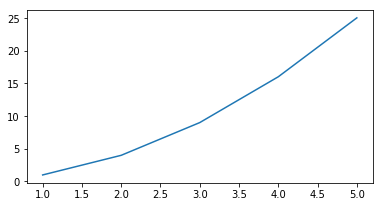

In [62]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(6,3))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

x= [1,2,3,4,5]

y=[x**2 for x in x]

axes.plot(x,y)
plt.savefig('test_graph.png')
plt.show()

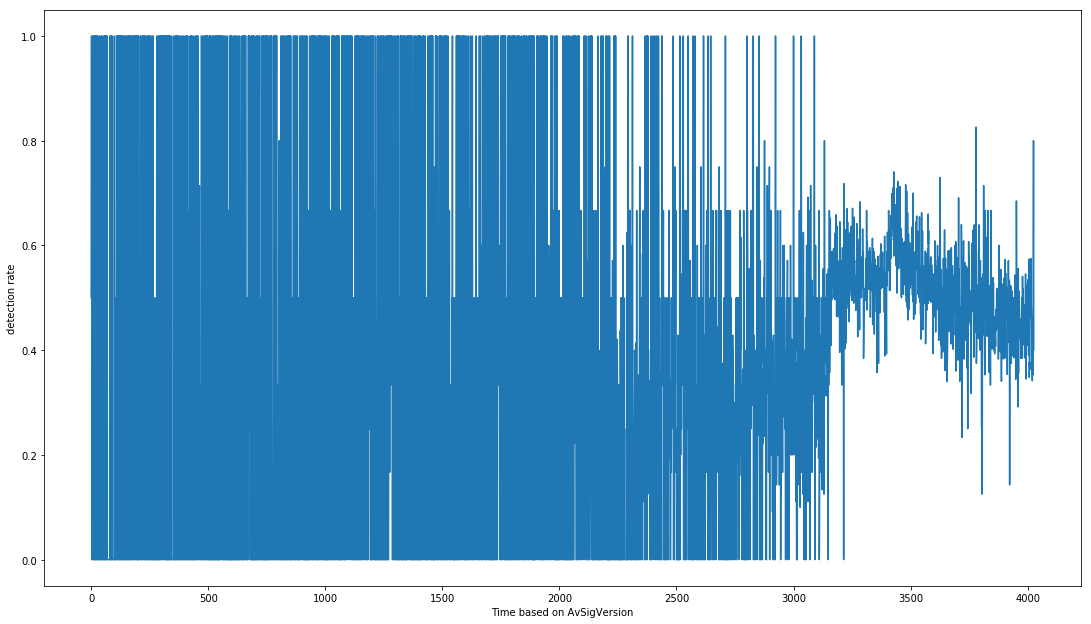

In [61]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(18,10))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

x= xAxis

y=yAxis
plt.xlabel('Time based on AvSigVersion')
plt.ylabel('detection rate')
axes.plot(x,y)
plt.savefig('time_graph.png')
plt.show()


#plt.plot( xAxis, yAxis,'ro')
#plt.show()

In [20]:
print(len(signatures))
print(len(set(signatures)))

99999
4027


In [56]:
keyErrors

5589

In [57]:
keyErrors=0
cv = KFold(n_splits=2)
X=data.iloc[:,:-1]
labels=data.iloc[:,-1]
for train_idx ,test_idx in cv.split(X):
    xlabel=labels[train_idx]
    ylabel=labels[test_idx]
    x,y=X.iloc[train_idx,:] ,X.iloc[test_idx]
    sigVersion=y[['AvSigVersion']].values.tolist()
    predicted=[]
    for line in sigVersion:
        si = line[0].split(".")
        key = int(("000"+str(si[1]))[-4:]+("000"+str(si[2]))[-4:])
        try:
            likely = answers[key]
            if likely>.5:
                predicted.append(1)
            else:
                predicted.append(0)
        except:
            predicted.append(1)
            keyErrors+=1
    acc = preprocessing.accuracy_score(ylabel, predicted)
    print(acc)

0.553832
0.5390461561846247


In [54]:
answers[2631641]

KeyError: 2631641

In [52]:
sigVersion[0]

['1.273.1735.0']

In [50]:
len(predicted)

1

In [137]:
cv = KFold(n_splits=2)

t=0
clf=RandomForestClassifier()
X=data.iloc[:,:-1]
labels=data.iloc[:,-1]
from itertools import combinations
fields=['Processor','Census_OSVersion','OsBuild','SkuEdition', \
             'Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName', \
             'AppVersion','AvSigVersion']
categMap={'CountryIdentifier':9,
          'EngineVersion':4,
          'AvSigVersion':6,
          'DefaultBrowsersIdentifier':4,
          'AVProductStatesIdentifier':6,
          'CityIdentifier':7,
          'OrganizationIdentifier':6,
          'GeoNameIdentifier':8,
          'LocaleEnglishNameIdentifier':12,
          'OsBuildLab':12,
          'IeVerIdentifier':14,
          'Census_OEMNameIdentifier':10,
          'Census_OEMModelIdentifier':4,
          'Census_ProcessorModelIdentifier':15}
fields2filter = []
for key, _ in categMap.items():
    fields2filter.append(key)
for field in fields:
    fields2filter.append(field)

    column_filtering=[]
    
    
for train_idx ,test_idx in cv.split(X):
    xlabel=labels[train_idx]
    ylabel=labels[test_idx]
    x,y=preprocessing.preProcessing(X.iloc[train_idx,:],X.iloc[test_idx,:],xlabel)
    for combs in combinations(fields2filter,5):
        t=0
        cols = list(combs)
        if not t:
            column_filtering=[]
            for column in x.columns:
                for col in cols:
                    if col in column:
                        column_filtering.append(column)
        print(column_filtering)
        clf.fit(x.loc[:,column_filtering], xlabel)
        predicted = clf.predict(y.loc[:,column_filtering])
        acc = preprocessing.accuracy_score(ylabel, predicted)
        #accuracies.append(acc)
        with open("accuracies_per_fields","a") as ofile:
            ofile.write(str(acc)+"; "+str(column_filtering)+"\n")
        
#print(train_idx)
#print(test_idx)

W0428 20:57:34.995007 24390 generic.py:3287] /home/mainuser/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s

W0428 20:57:48.674164 24390 forest.py:246] /home/mainuser/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



['AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'Census_OEMModelIdentifier']
['AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuildLab']
['DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier']
['AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier']
['AVProductStatesIdentifier', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier']
['EngineVersion', 'AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier']
['AvSigVersion', 'AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentifier']
['AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'LocaleEnglishNameIdentif

KeyboardInterrupt: 

In [132]:
from itertools import combinations
fields=['Processor','Census_OSVersion','OsBuild','SkuEdition', \
             'Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName', \
             'AppVersion','AvSigVersion']
categMap={'CountryIdentifier':9,
          'EngineVersion':4,
          'AvSigVersion':6,
          'DefaultBrowsersIdentifier':4,
          'AVProductStatesIdentifier':6,
          'CityIdentifier':7,
          'OrganizationIdentifier':6,
          'GeoNameIdentifier':8,
          'LocaleEnglishNameIdentifier':12,
          'OsBuildLab':12,
          'IeVerIdentifier':14,
          'Census_OEMNameIdentifier':10,
          'Census_OEMModelIdentifier':4,
          'Census_ProcessorModelIdentifier':15}
cols = []
for key, _ in categMap.items():
    cols.append(key)
for field in fields:
    cols.append(field)
for kaka in combinations(cols,5):
    print(list(kaka))
    break

['LocaleEnglishNameIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'Census_OEMModelIdentifier']


In [130]:
print(cols)

['LocaleEnglishNameIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'OrganizationIdentifier', 'Census_OEMModelIdentifier', 'OsBuildLab', 'DefaultBrowsersIdentifier', 'IeVerIdentifier', 'CityIdentifier', 'EngineVersion', 'AvSigVersion', 'Census_OEMNameIdentifier', 'Census_ProcessorModelIdentifier', 'GeoNameIdentifier', 'Processor', 'Census_OSVersion', 'OsBuild', 'SkuEdition', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'AppVersion', 'AvSigVersion']


In [127]:
accuracies

[0.5085, 0.512256128064032]

In [103]:
importlib.reload(preprocessing)

<module 'preprocessing' from '/home/mainuser/classes/CS558/Project/Computer_Security_Project/preprocessing.py'>

In [24]:
data1 = data[['Processor','Census_OSVersion','OsBuild','SkuEdition',
             'Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName',
             'AppVersion','AvSigVersion','HasDetections']]

In [105]:
cat columns_saved

Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm',
       ...
       'Census_FirmwareManufacturerIdentifier_820.0',
       'Census_FirmwareManufacturerIdentifier_827.0',
       'Census_FirmwareManufacturerIdentifier_839.0',
       'Census_FirmwareManufacturerIdentifier_845.0',
       'Census_FirmwareManufacturerIdentifier_869.0',
       'Census_FirmwareManufacturerIdentifier_892.0',
       'Census_FirmwareManufacturerIdentifier_897.0',
       'Census_FirmwareManufacturerIdentifier_1014.0',
       'Census_FirmwareManufacturerIdentifier_1030.0',
       'Census_FirmwareManufacturerIdentifier_1075.0'],
      dtype='object', length=459)


In [104]:
cols=['Processor','Census_OSVersion','OsBuild','SkuEdition', \
             'Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName', \
             'AppVersion','AvSigVersion']
preprocessing.cross_validation(data,4,'results_1',filter_columns=cols)

W0428 16:45:32.349308 24390 generic.py:3287] /home/mainuser/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s

W0428 16:45:42.444940 24390 indexing.py:1269] /home/mainuser/.local/lib/python3.5/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)

W0428 16:45:42.446646 24390 forest.py:246] /home/mainuser/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default va

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [89]:
data.columns()

TypeError: 'Index' object is not callable

In [9]:
while True:
    preprocessing.cross_validation(data=data,k=5,file_out='train_samples2')

KeyError: 'EngineVersion'

In [144]:
accuracies=[]
with open("accuracies_per_fields",'r') as inFile:
    for line in inFile:
        accuracies.append(float(line[:line.find(";")]))
        


In [156]:
import pandas as pd, numpy as np
submit = pd.read_csv('train_samples.csv', usecols=['MachineIdentifier','AvSigVersion'])
submit['HasDetections'] = 0.5
submit['ASV2'] = submit['AvSigVersion'].map(lambda x: np.int(x.split('.')[1]) )
submit['ASV3'] = submit['AvSigVersion'].map(lambda x: np.int(x.split('.')[2]) )
submit.loc[ (submit['ASV2']==281) &amp  (submit['ASV3'] >= 451),'HasDetections'] = 0.0
submit[['MachineIdentifier','HasDetections']].to_csv('WinningSolution.csv', index=False)  

NameError: name 'amp' is not defined

In [145]:
max(accuracies)

0.594

In [158]:
asv=[[],[]]
for each in data.AvSigVersion:
    _,asv2,asv3,_ = each.split(".")
    if asv2 not in asv[0]:
        asv[0].append(asv2)
    if asv3 not in asv[1]:
        asv[1].append(asv3)

In [2]:
x=[]
y=[]
accurs=[]

with open("prun_graph","r") as graph_data:
    for value in graph_data:
        if float(value)>1:
            if accurs:
                y.append(sum(accurs)/len(accurs))
                accurs=[]
            x.append(float(value))
        else:
            accurs.append(float(value))
print(x)
print(y)

[2.0, 7.0, 12.0, 17.0, 22.0, 27.0, 32.0, 37.0, 42.0]
[0.5896159152957647, 0.5957959582979149, 0.603116014300715, 0.6076660813040652, 0.6092560698034902, 0.6094260788039403, 0.6126160643032152, 0.6142261358067904]


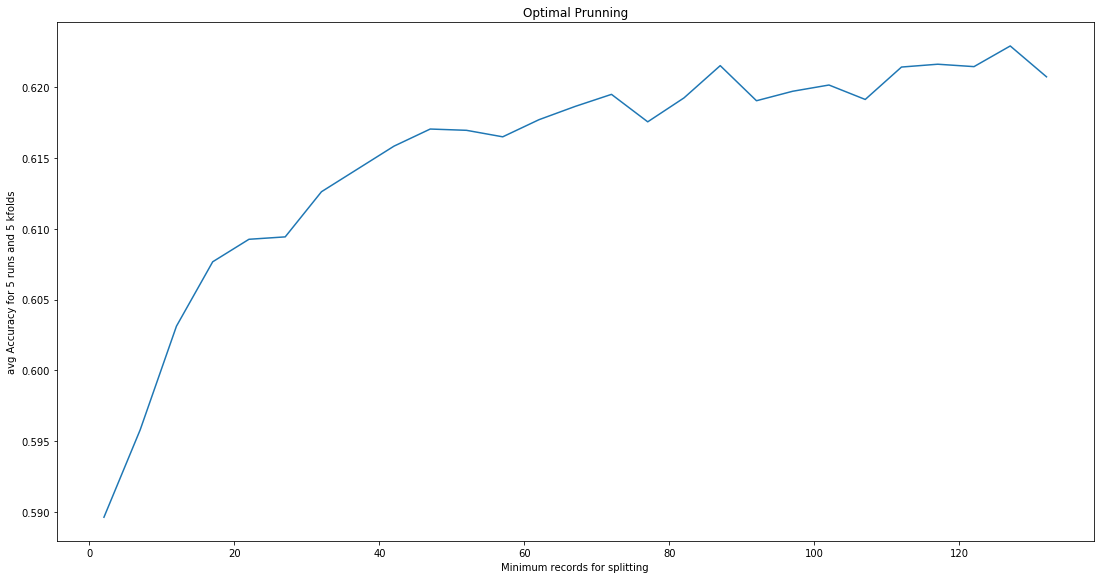

[0.5896159152957647, 0.5957959582979149, 0.603116014300715, 0.6076660813040652, 0.6092560698034902, 0.6094260788039403, 0.6126160643032152, 0.6142261358067904, 0.6158361223061153, 0.6170461103055154, 0.6169561538076904, 0.6164961358067904, 0.6177061453072653, 0.6186461558077904, 0.6194961733086655, 0.6175561768088405, 0.6192461718085904, 0.6215262173108655, 0.6190461308065404, 0.6197162108105405, 0.6201561908095405, 0.6191360978048903, 0.6214261918095906, 0.6216261828091405, 0.6214561808090405, 0.6229161818090904, 0.6207361863093155]


In [7]:
import matplotlib.pyplot as plt
x=[]
y=[]
accurs=[]

with open("prun_graph","r") as graph_data:
    for value in graph_data:
        if float(value)>1:
            if accurs:
                y.append(sum(accurs)/len(accurs))
                accurs=[]
            x.append(float(value))
        else:
            accurs.append(float(value))

fig= plt.figure(figsize=(18,9))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

x= x[:-1]
plt.title("Optimal Prunning")
plt.xlabel('Minimum records for splitting')
plt.ylabel('avg Accuracy for 5 runs and 5 kfolds')
#y=y[:-1]

axes.plot(x,y)
plt.savefig("Optimal_prun")
plt.show()
print(y)

In [ ]:
    conv2Int=['AVProductStatesIdentifier',
             'DefaultBrowsersIdentifier',
             'AVProductsInstalled',
             'AVProductsEnabled',
              'CityIdentifier',
             'OrganizationIdentifier',
             'GeoNameIdentifier',
             'IsProtected',
             'IeVerIdentifier',
             'Firewall',
             'Census_OEMNameIdentifier',
             'Census_OEMModelIdentifier',
             'Census_ProcessorCoreCount',
             'Census_ProcessorManufacturerIdentifier',
             'Census_ProcessorModelIdentifier']
    categMap={'CountryIdentifier':9,
              'EngineVersion':4,
              'AppVersion':5,
              'AvSigVersion':6,
              'DefaultBrowsersIdentifier':4,
              'AVProductStatesIdentifier':6,
              'CityIdentifier':7,
              'OrganizationIdentifier':6,
              'GeoNameIdentifier':8,
              'LocaleEnglishNameIdentifier':12,
              'OsBuildLab':12,
              'IeVerIdentifier':14,
              'Census_OEMNameIdentifier':10,
              'Census_OEMModelIdentifier':4,
              'Census_ProcessorModelIdentifier':15
             }
    columns2Ignore=['MachineIdentifier','IsBeta','AutoSampleOptIn','PuaMode','SMode','UacLuaenable',
                   'Census_DeviceFamily',
                    'Census_ProcessorClass',
                    'Census_InternalBatteryType',
                    'Census_InternalBatteryNumberOfCharges',
                    'Census_OSVersion',
                   'Census_IsFlightingInternal',
                   'Census_FirmwareVersionIdentifier']
    columns2Dummy=['ProductName',
                   'Platform',
                   'Processor',
                   'OsVer',
                   'OsBuild',
                   'OsSuite',
                   'OsPlatformSubRelease',
                   'SkuEdition',
                   'SmartScreen',
                   'Census_MDC2FormFactor',
                   'Census_PrimaryDiskTypeName',
                   'Census_ChassisTypeName',
                   'Census_PowerPlatformRoleName',
                   'Census_OSArchitecture',
                  'Census_OSBuildNumber',
                  'Census_OSBuildRevision',
                  'Census_OSEdition',
                  'Census_OSBranch',
                   'Census_OSSkuName',
                  'Census_OSInstallTypeName',
                  'Census_OSInstallLanguageIdentifier',
                  'Census_OSWUAutoUpdateOptionsName',
                  'Census_GenuineStateName',
                  'Census_ActivationChannel',
                  'Census_FlightRing',
                   'Wdft_RegionIdentifier',
                   'Census_FirmwareManufacturerIdentifier'
                  ]